In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import ndarray
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import (StandardScaler, 
                                   MaxAbsScaler,
                                   QuantileTransformer,
                                   MinMaxScaler,
                                   Normalizer)

from PlotUtils import (plot_mnist_samples, 
                       plot_different_scalers_output)
from TrainUtils import whole_in_one

%load_ext autoreload
%autoreload 2

# Загрузка MNIST

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
y = y.astype(np.int32)

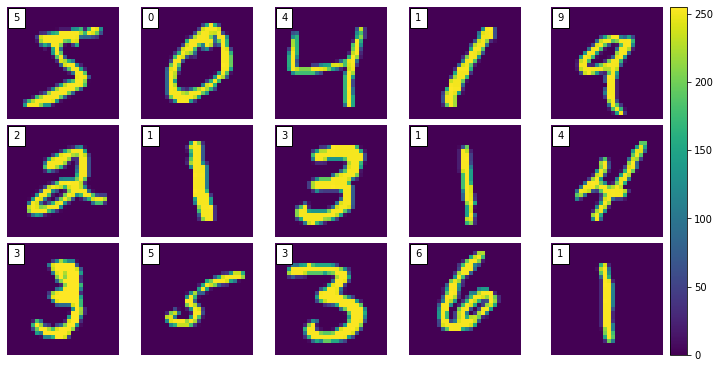

In [22]:
plot_mnist_samples(X=X, y=y, rows=3, figsize=(10, 5))

<BarContainer object of 10 artists>

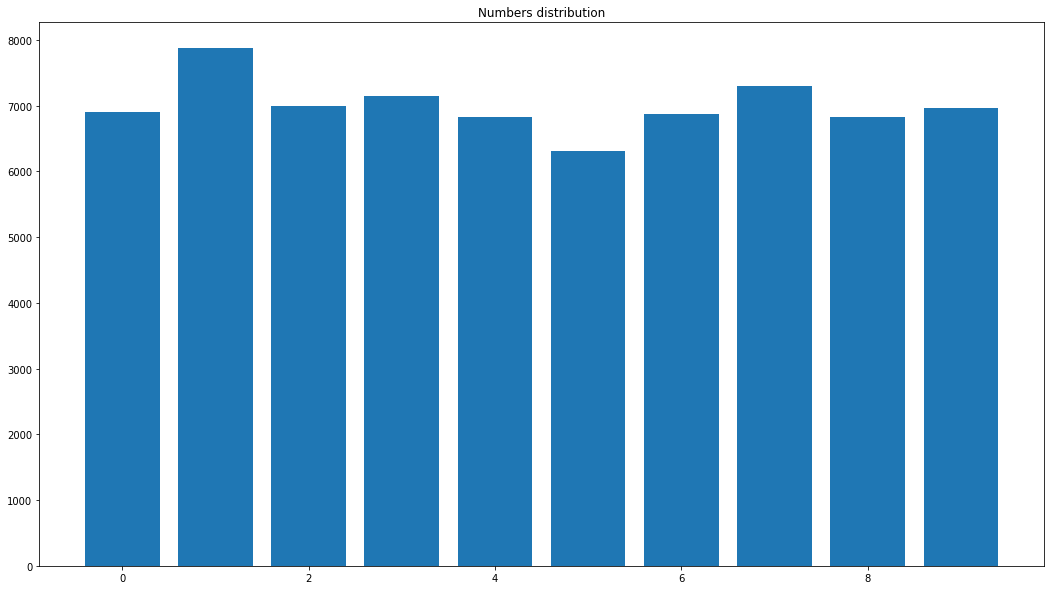

In [31]:
plt.figure(figsize=(18, 10))
plt.title("Numbers distribution")
plt.bar(np.unique(y), height=np.bincount(y))

# Примеры data preprocessing

In [4]:
quant_trans_uniform = QuantileTransformer(output_distribution="uniform")
quant_trans_normal = QuantileTransformer(output_distribution="normal")


unscaled_data = X
end_sample = unscaled_data.shape[0]
plot_labels = y[: end_sample]
distributions = [
    ("Unscaled data", unscaled_data),
    ("Data after standard scaling", StandardScaler().fit_transform(unscaled_data)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(unscaled_data)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(unscaled_data)),
    ("Data after quantile transformation (uniform pdf)", quant_trans_uniform.fit_transform(unscaled_data)),
    ("Data after quantile transformation (gaussian pdf)", quant_trans_normal.fit_transform(unscaled_data)),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(unscaled_data))
]

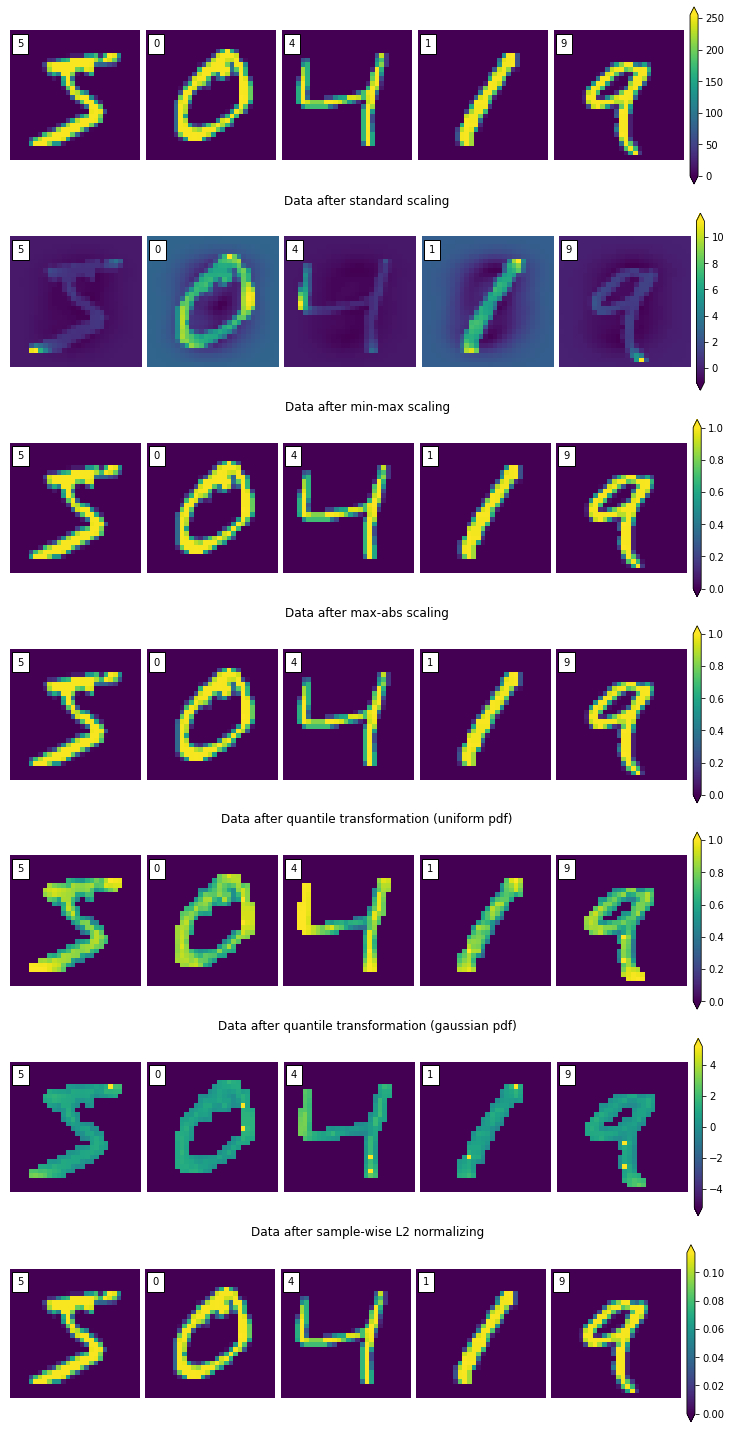

In [21]:
plot_different_scalers_output(plot_labels, distributions)

# Тренировка SVC на unscaled data

> Current metric is: accuracy
> Best metric is: 0.958


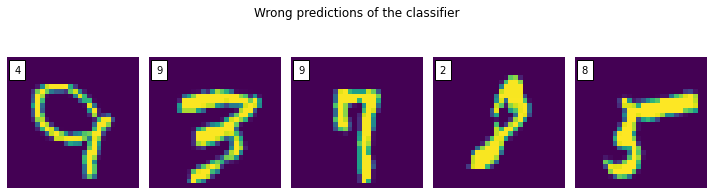

In [20]:
clf = SVC()
whole_in_one(clf=clf, X=X, y=y)

# Тренировка SVC на standard scaled data

> Current metric is: accuracy
> Best metric is: 0.932


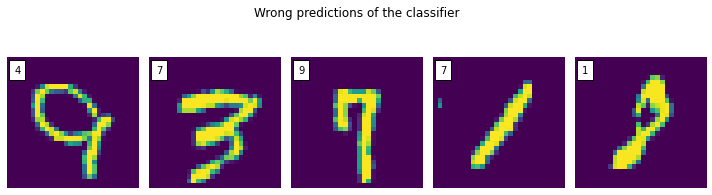

In [14]:
clf = make_pipeline(StandardScaler(), SVC())
whole_in_one(clf=clf, X=X, y=y)

# Тренировка SVC на min-max scaled data

> Current metric is: accuracy
> Best metric is: 0.954


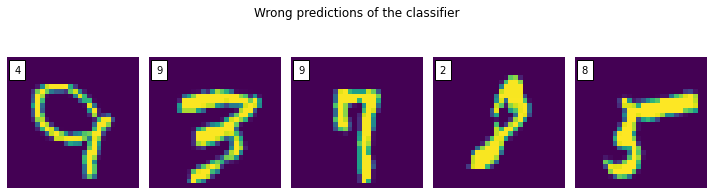

In [15]:
clf = make_pipeline(MinMaxScaler(), SVC())
whole_in_one(clf=clf, X=X, y=y)

# Тренировка SVC на max-abs scaled data

> Current metric is: accuracy
> Best metric is: 0.954


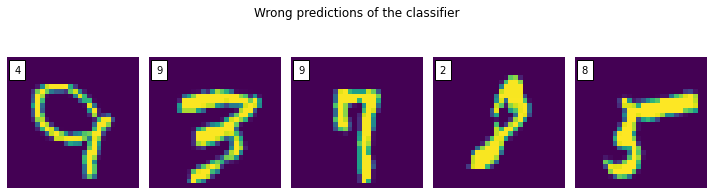

In [16]:
clf = make_pipeline(MaxAbsScaler(), SVC())
whole_in_one(clf=clf, X=X, y=y)

# Тренировка SVC на quantile (uniform) scaled data

> Current metric is: accuracy
> Best metric is: 0.9793076923076923


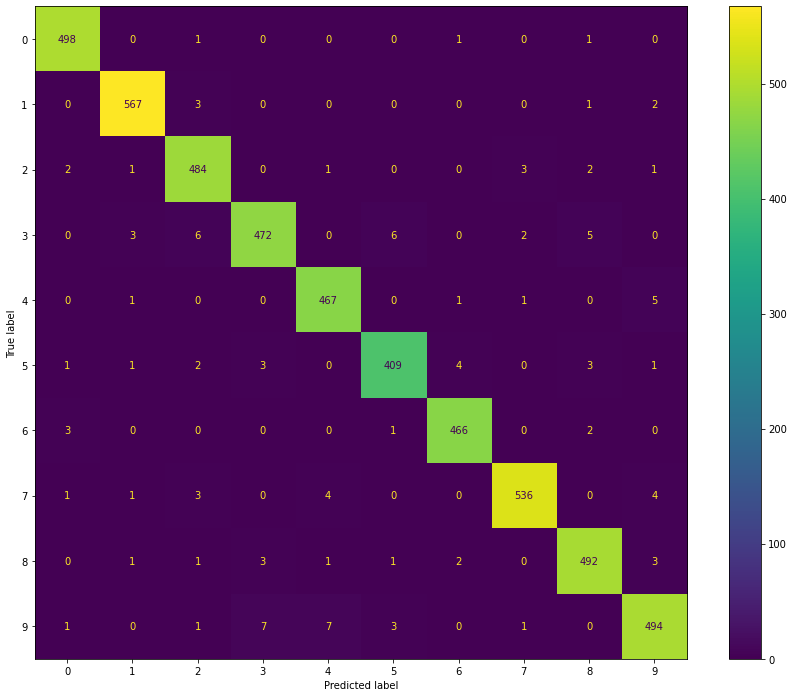

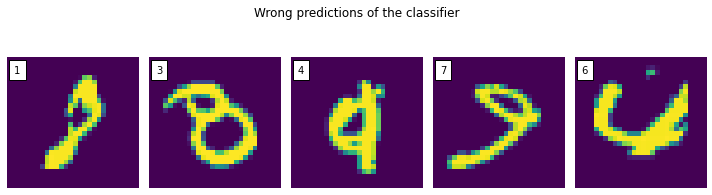

Pipeline(steps=[('quantiletransformer', QuantileTransformer()), ('svc', SVC())])

In [6]:
clf = make_pipeline(quant_trans_uniform, SVC())
whole_in_one(clf=clf, X=X, y=y, train_size=65000)

# Тренировка SVC на quantile (gaussian) scaled data

> Current metric is: accuracy
> Best metric is: 0.956


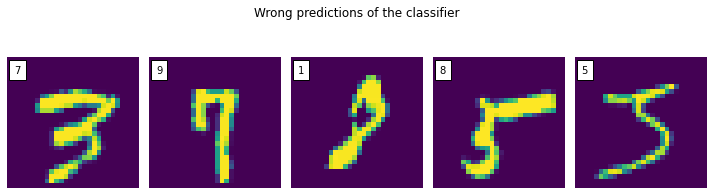

In [18]:
clf = make_pipeline(quant_trans_normal, SVC())
whole_in_one(clf=clf, X=X, y=y)

# Тренировка SVC на normalized data

> Current metric is: accuracy
> Best metric is: 0.961


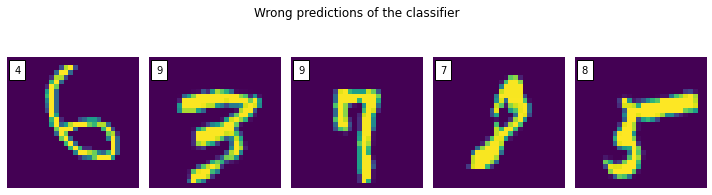

In [19]:
clf = make_pipeline(Normalizer(), SVC())
whole_in_one(clf=clf, X=X, y=y)